# Solar Prediction

We want to predict the solar energy output using the data.

Start by importing and loading the data.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('/Users/ben/Desktop/Senior-project/Final_Merged_Energy_and_Weather_Data.csv')        # change path to run...


## Decision Tree

Alter the dataframe...

RMSE: 35.89824801471955


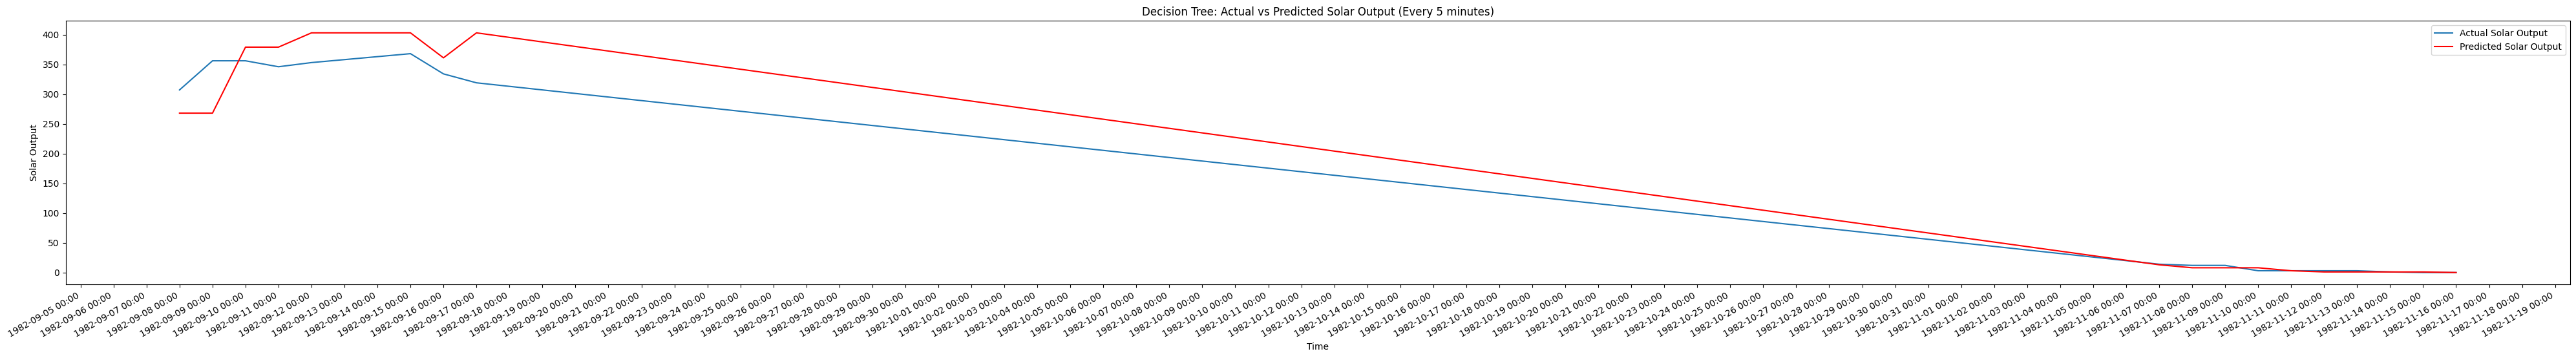

In [6]:

# Create lagged features for past solar output (lag 1 and lag 2)
data['solar_output_lag1'] = data['Solar'].shift(1)
data['solar_output_lag2'] = data['Solar'].shift(2)
data['solar_output_lag3'] = data['Solar'].shift(3)

# Drop any rows with missing values due to lagging
data.dropna(inplace=True)

# Define features and target
features = [ 'uvindex', 'precip','temp', 'solarradiation', 'solar_output_lag1','solar_output_lag2']
X = data[features]
y = data['Solar']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, shuffle=False)

# Initialize and train the Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=20, random_state=32)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


results = pd.DataFrame({
    'Time': data.index[-len(y_test):],
    'Actual Solar Output': y_test,
    'Predicted Solar Output': y_pred
})
results.to_excel('predicted_solar_output.xlsx', index=False)
# Calculate RMSE to evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

import matplotlib.dates as mdates


# Plot with customized date format
plt.figure(figsize=(50, 6))
plt.plot(y_test.index, y_test, label='Actual Solar Output')
plt.plot(y_test.index, y_pred, label='Predicted Solar Output', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Tick marks every day
plt.gcf().autofmt_xdate()  # Rotate the dates for better readability
plt.legend()
plt.title('Decision Tree: Actual vs Predicted Solar Output (Every 5 minutes)')
plt.xlabel('Time')
plt.ylabel('Solar Output')
plt.show()



